<a href="https://colab.research.google.com/github/SIDDHU-1944/Data_Science/blob/main/Customer_churn_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. importing dependencies

In [ ]:
import numpy as np
import pandas as pd #mandatory
import matplotlib.pyplot as plt #to plot
import seaborn as sns # to build plots
from sklearn.preprocessing import LabelEncoder # to encode the category data
from imblearn.over_sampling import SMOTE #for oversampling solving class imbalance
from sklearn.model_selection import train_test_split, cross_val_score
#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 2. data collection or data loading and understanding

In [ ]:
filepath= "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "blastchar/telco-customer-churn",
  filepath)

/tmp/ipython-input-1373422965.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df=kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "blastchar/telco-customer-churn",


Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 




* cust id is not req for us so can drop down
* total charges data type is object so we have to change it



In [ ]:
#dropping customerID column
df = df.drop(columns=['customerID'])

In [ ]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
254,Male,0,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.85,193.05,No
962,Male,1,Yes,No,8,Yes,No,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),60.90,551.95,No


In [ ]:
# printing the unique values in all the columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in df.columns:
  if col not in numerical_features:
    print(col, df[col].unique())
    print('='*50)

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
#converting total charges from string type to float type
#but some are having missing values
missing_tc=df[df['TotalCharges']==' ']

In [ ]:
len(missing_tc)

11

In [ ]:
#replacing these empty strings
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"})

In [ ]:
df['TotalCharges']= df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the class distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


the class is imbalance so we cant directly train data we have to perform oversampling or undersampling

**Insights So far:**


1.  Customer Id removed since not req
2.  No missing values in dataset
1. Missing values in Total Charge were replaced by 0
2.   Class imbalance identified in the target







# 3. Exploratory Data Analysis(EDA)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features analysis**

Understanding the distribution of the numerical features

In [ ]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  #calc the mean and median values for the columns
  col_mean= df[column_name].mean()
  col_median= df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='dashed', label='Mean')
  plt.axvline(col_median, color='blue', linestyle='solid', label='Median')

  plt.legend()
  plt.show()


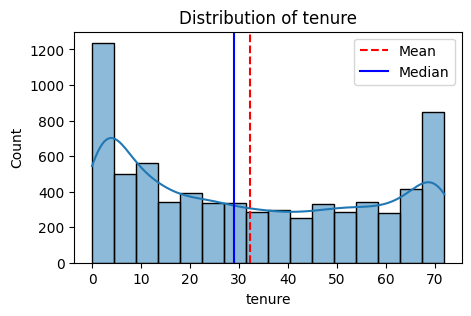

In [ ]:
plot_histogram(df, "tenure")

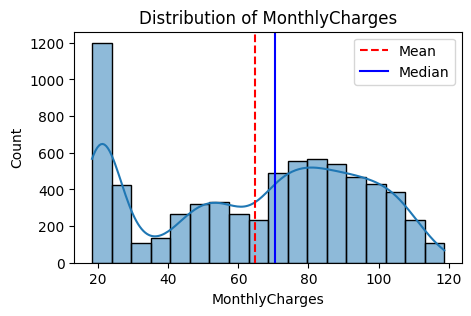

In [ ]:
plot_histogram(df, "MonthlyCharges")

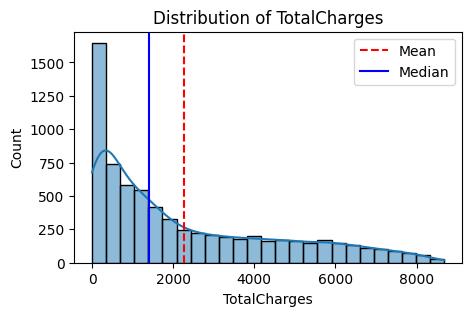

In [ ]:
plot_histogram(df, "TotalCharges")

Distribution is skewed so logistic regression or svm classifiers not suitable

Box plot for numerical features

In [ ]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.ylabel(column_name)
  plt.show

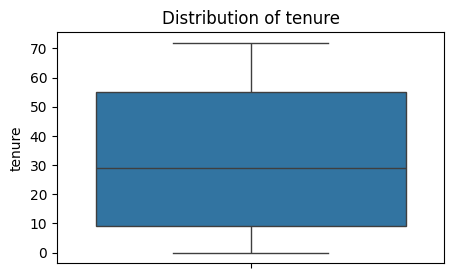

In [ ]:
plot_boxplot(df, "tenure")

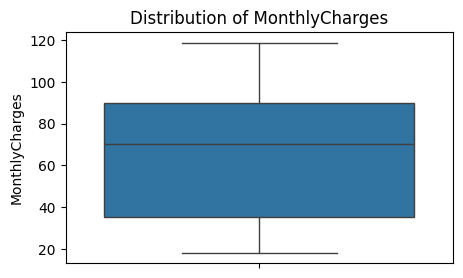

In [ ]:
plot_boxplot(df, "MonthlyCharges")

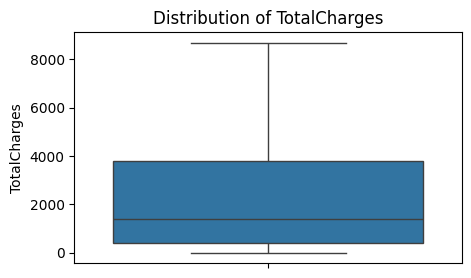

In [ ]:
plot_boxplot(df, "TotalCharges")

From box plot we got to know that there are no outliers (since no dots beyond lines)

**Correlation Heatmap for numerical columns**

<Axes: >

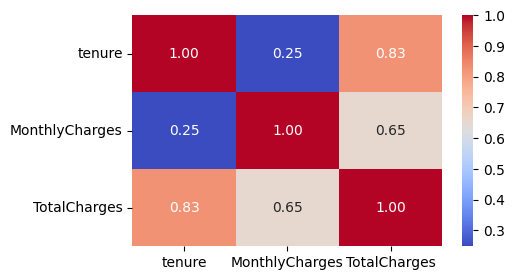

In [ ]:
#correlation matrix - heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df[["tenure","MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt='.2f')

**Categorial features- Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

countplot for categorial columns

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns.to_list()
object_cols = object_cols+["SeniorCitizen"]
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

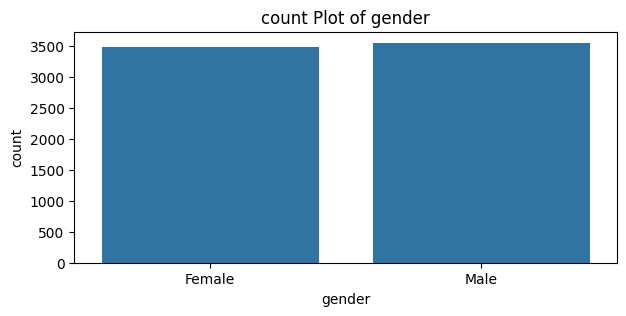

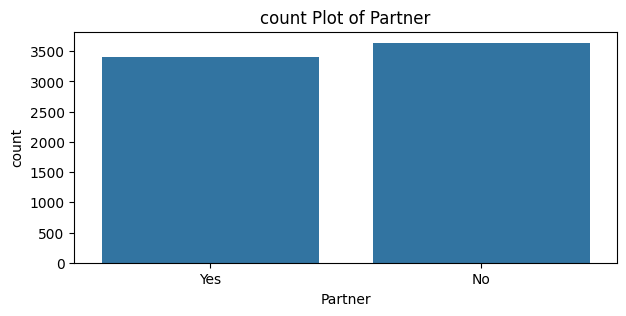

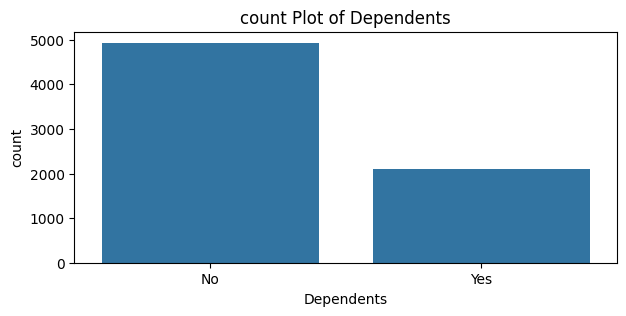

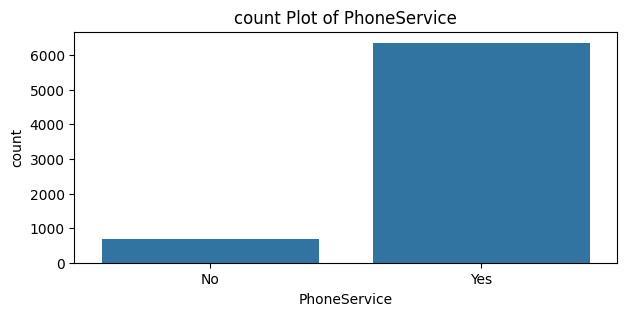

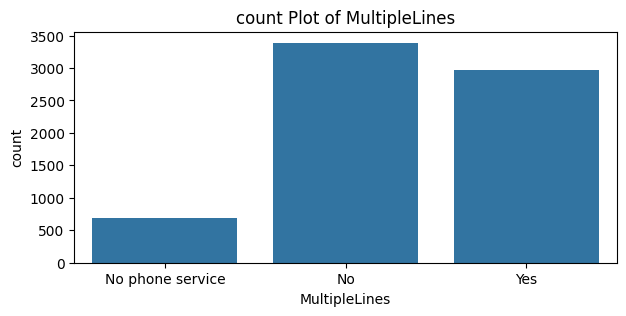

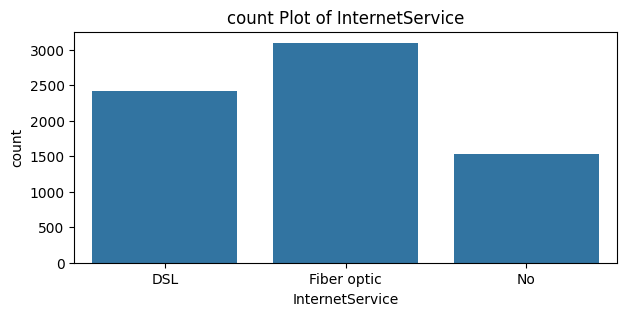

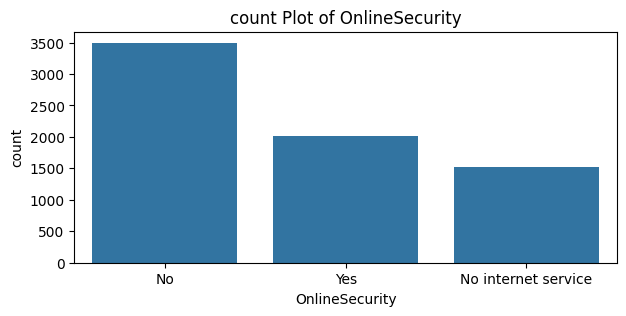

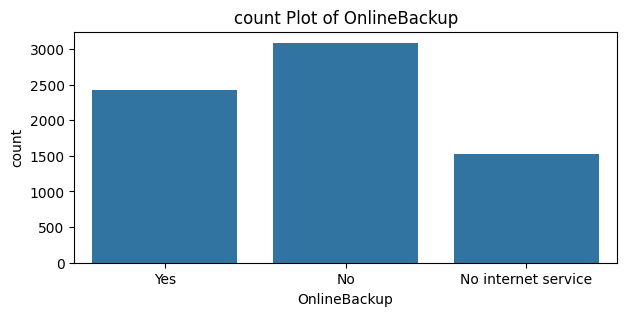

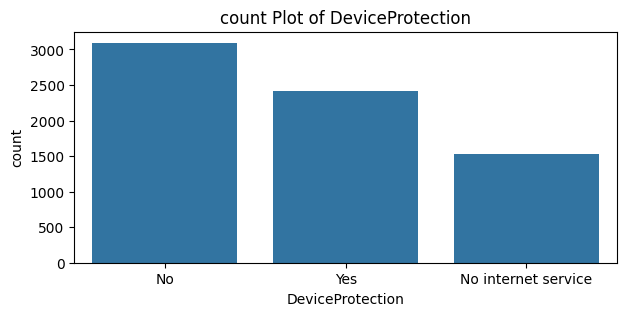

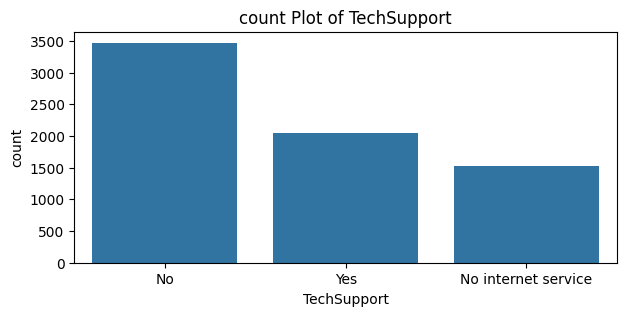

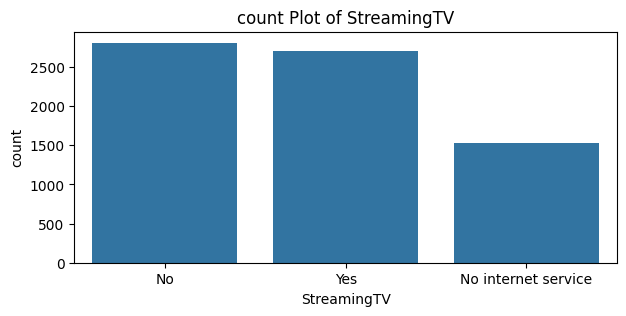

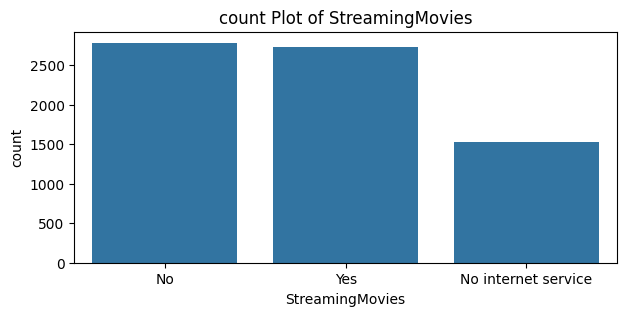

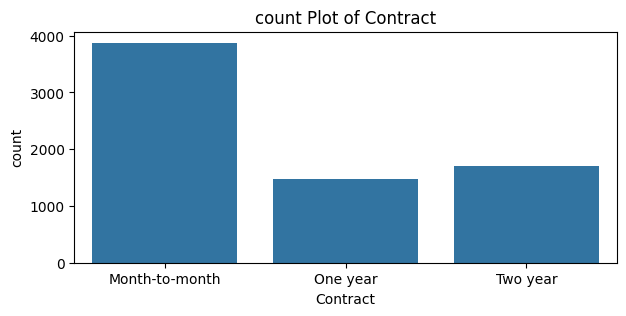

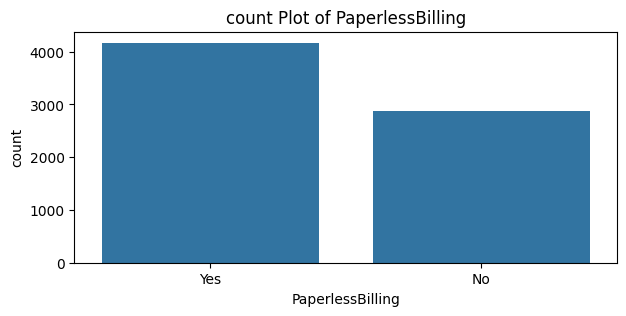

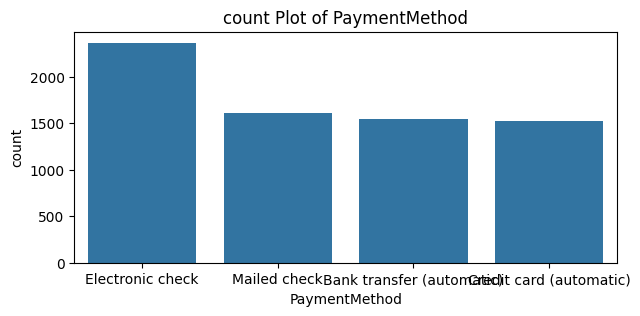

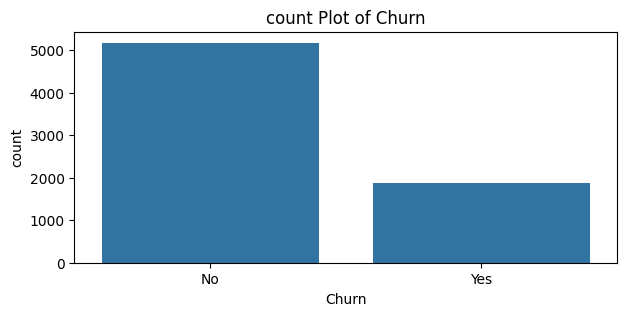

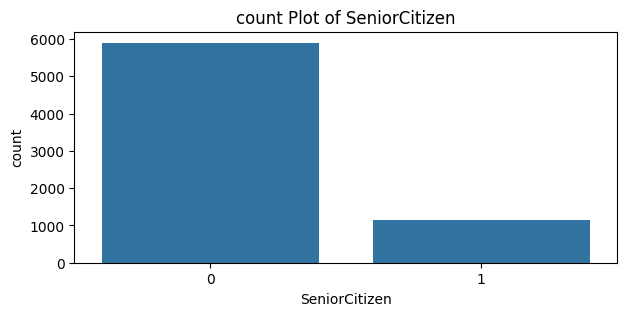

In [ ]:
for col in object_cols:
  plt.figure(figsize=(7,3))
  sns.countplot(x=df[col])
  plt.title(f"count Plot of {col}")
  plt.show()

# 4.**Data Preprocessing**

label encoding of target(churn) column

In [ ]:
df['Churn']= df['Churn'].replace({"Yes" : 1, "No" : 0})

/tmp/ipython-input-217099695.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']= df['Churn'].replace({"Yes" : 1, "No" : 0})


In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


label encoding of categorial features

In [ ]:
#identifying with object data type
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
#initialize a dictionary to save the encoders
encoders = {}


#apply label encoding and store the encoders
for column in object_columns:
  label_encoder= LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders,f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Training and Test data splitting**

In [ ]:
#splitting the features and target
x = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
print(Y_train.shape)

(5634,)


In [ ]:
print(Y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


**Synthetic minority over sampling technique(SMOTE)**

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
#to make an even distribution of 0,1 the minority is oversampled
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print(Y_train_smote.shape)

(8276,)


In [ ]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# 5.**Model Training**

Training with default hyper parameters

In [ ]:
#dictinary of models
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBRFClassifier(random_state=42)
}

In [ ]:
# dictionary to score the cross validation results
cv_scores= {}

# perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote,Y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name]= scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print('-'*80)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
--------------------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
--------------------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.81
--------------------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.71799517, 0.77220544, 0.85498489, 0.83987915, 0.85135952])}

Random Forest gives the highest accuracy comapared to other models with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

# 6. **Model Evaluation**

In [ ]:
#evaluate on test data
Y_test_pred = rfc.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

Accuracy score:
 0.7785663591199432
Confusion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
x.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_name": x.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data,f)

# 7. **Load the same model and build a predictive system**

In [ ]:
#load the saved model and feature names:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data['model']
feature_names = model_data['features_name']

In [ ]:
print(loaded_model)
print(feature_names)

RandomForestClassifier(random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.78 0.22]]


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}